In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
# 显示图像
def img_show(img):
    if len(img.shape) == 3:
        if img.shape[-1]==3:
            b,g,r = cv2.split(img)
            img = cv2.merge([r,g,b])
        elif img.shape[-1]==4:
            b,g,r,a = cv2.split(img)
            img = img
        plt.imshow(img)
    elif len(img.shape) == 2:
        plt.imshow(img,cmap="gray")

In [5]:
# 随机加椒盐函数
def salt(img,n):
    # 循环添加n个椒盐
    for k in range(n):
        # 随机添加椒盐的坐标
        i = int(np.random.random()*img.shape[0])
        j = int(np.random.random()*img.shape[1])
        # 若位灰度图
        img[i,j] = 255
        # 若为RGB图
        img[i,j,0] = 255
        img[i,j,0] = 255
        img[i,j,0] = 255
    return img

In [6]:
# 清洗锐化图片
def cleaning(img):
    bgr = cv2.split(img)
    bgrNew = []
    for c in bgr:
        c = cv2.threshold(c,127,255,cv2.THRESH_BINARY)
        bgrNew.append(c[1])
    img = cv2.merge(bgrNew)
    return img

hand = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/hand.png")
cleaning(hand)
cv2.imwrite("/Users/tanjun/Desktop/tanjun/opencv/hand.png",hand)

True

In [7]:
# 霍夫变换是一种在图像内寻找直线、圆形以及其他简单形状的方法
# 霍夫变换采用类似于投票的方式来获取当前图像内的形状集合
# opencv中，寻找直线可以用cv2.HoughLines()和cv2.HoughLinesP()
# 寻找圆可以用cv2.HougnCircles()

# 16.1 霍夫直线变换

In [8]:
# opencv中提供了函数cv2.HoughLines()和函数cv2.HoughLinesP()用来实现霍夫直线变换

### 16.1.1 霍夫变换原理

In [9]:
# 角度一：笛卡尔空间的一条线对应霍夫空间的一个点
# 角度二：笛卡尔空间的一个点对应霍夫空间的一条线

# 理解：
# 1.笛卡尔空间中一条直线上有3个点，这三个点映射到霍夫空间中就是有3条直线穿过同一点
# 2.霍夫空间中一个点有3条直线穿过，这个点映射到笛卡尔空间中就是一条直线上有3个点

# 综述，在霍夫空间内，经过一个点的直线越多，说明其在笛卡尔空间内映射的直线是由越多的点构成（穿过）的
# 计算中，我们希望用更多的点构造的直线，以提高直线的可靠性。也就是说，如果一条直线有越多的点构成，那它实际存在的可能行越大，可靠性越高
# 因此，霍夫变换选择直线的思路是：选择有尽可能多的直线交汇的点

# 在笛卡尔空间中可能存在垂线，此时斜率k为无穷大，截距b无法取值，因此垂线无法映射到霍夫空间
# 为解决上述问题，可以考虑将笛卡尔坐标系映射到极坐标系上：
# 笛卡尔坐标系内用斜率k和截距b，即(k,b)表示一条直线：y=kx+b
# 极坐标系中用极径r和极角θ，即(r,θ)表示一条直线：r=xcosθ+ysinθ
# 式中，r是直线到原点O的距离，θ是直线的垂线与x轴的角度

# 极坐标系与霍夫坐标系映射关系：
# 1.极坐标系内的一个点映射为霍夫空间内的一条线
# 2.极坐标系内的一条线映射为霍夫空间内的一个点

### 16.1.2 houghLines 函数

In [10]:
# opencv提供cv2.HoughLines()函数用来检测直线，该函数要求操作的源图像是一个二进制图像，
# 所以在霍夫变换之前要将原图进行二值化，或者进行Canny边缘检测

# lines = cv2.HoughLines(image,rho,theta,threshold)
# image：源图像，8通道二值图
# rho：以像素为单位的距离r的精度，一般使用精度是1
# theta：角度θ精度，一般使用精度为π/180，表示要搜索所有可能的角度
# threshold：阈值，值越小，判定的直线越多，即多少个点位于直线上，大于阈值，认为原图像中存在该直线

# 需强调：cv2.HoughLines()检测到的是图像中的直线，而不是线段，因此没有端点
# 绘制直线的方法是：
# -对于垂直方向的直线（不是指垂线，是指垂直方向上各种角度的直线），计算它与图像水平边界（即图像的第一行和最后一行）的交叉点，
# 然后在这两个交叉点之间画线
# -对于水平方向上的直线，计算它们与图像垂直边界的交叉点，然后在这两个交叉点之间画线

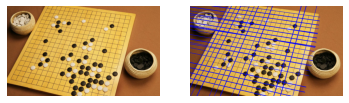

In [45]:
wq = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wq.jpeg")

rgb = cv2.cvtColor(wq,cv2.COLOR_BGR2RGB)
rgbShow = rgb.copy()

# 二值化或Canny
gray = cv2.cvtColor(wq,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)

# 霍夫直线检测
lines = cv2.HoughLines(edges,1,np.pi/180,300)

# 绘制直线
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0+1000*(-b))
    y1 = int(y0+1000*(a))
    x2 = int(x0-1000*(-b))
    y2 = int(y0-1000*(a))
    cv2.line(rgbShow,(x1,y1),(x2,y2),(0,0,255),2)

# 显示
plt.subplot(121),plt.imshow(rgb),plt.axis("off")
plt.subplot(122),plt.imshow(rgbShow),plt.axis("off")
plt.show()

# 较粗的直线是因为很多条直线靠在一起，重复结果，在一些复杂背景图像中误检很明显，为解决该问题，提出了改进版--该利霍夫变换

### 16.1.3 HoughLinesP 函数

In [47]:
# 概率霍夫变换是对霍夫变换的改进优化，它没有考虑所有的带你，只考虑一个足以进行线检测的随机子集即可

# 为了更好地判断直线（线段），概率霍夫变换还对选取直线的方法做了两点该井：
# 1.所接受直线的最小长度。如果超过阈值个数的像素点构成一条直线，但该直线很短，就过滤
# 2.接受直线时允许的最大像素点间距。如果超过阈值个数的像素点构成直线，但这组像素点的距离都很远，过滤

# opencv中提供函数cv2.HoughLinesP()来进行概率霍夫变换
# lines = cv2.HoughLinesP(image,rho,theta,threshold,minLineLengh,maxLineGap)
# image：输入图像，8位单通道二值图
# rho：以像素为单位的距离r精度，一般为1
# theta：角度精度，一般为np.pi/180，表示所有可能搜索角度
# threthold：阈值，越大判定出的直线越少
# minLineLength：接受直线的最小长度，默认为0
# MaxLineGap：控制共线线段之间的最小间隔，即在两点中两点的最大间隔。如两点间隔超过了maxLineGap，就认为这两点不在一条线上。默认0
# lines：np.ndarrary类型元素构成的，其中每个元素都是一对浮点数，表示检测到直线的参数（r,θ）

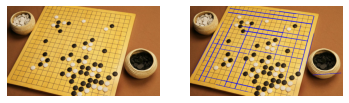

In [65]:
wq = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wq.jpeg",-1)

wqRGB = cv2.cv2.cvtColor(wq,cv2.COLOR_BGR2RGB)
wqShow = wqRGB.copy()

gray = cv2.cvtColor(wq,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize=3)
lines = cv2.HoughLinesP(edges,1,np.pi/180,1,minLineLength=200,maxLineGap=10)

for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(wqShow,(x1,y1),(x2,y2),(0,0,255),2)
    
plt.subplot(121),plt.imshow(wqRGB),plt.axis("off")
plt.subplot(122),plt.imshow(wqShow),plt.axis("off")
plt.show()

# 16.2 霍夫圆环变换

In [68]:
# 霍夫变换除了用来检测直线外，也能用来检测其他对象。
# 实际上，只要能用一个参数方程表示的对象，都适合用霍夫变换来检测

# 用霍夫圆变换来检测图像中的圆，与检测直线原理类似。
# 在霍夫圆变换中，需要考虑圆半径和圆心（x，y）3个参数，opencv中采用的策略是两轮筛选：
# 第一轮：筛选出可能存在圆的位置（圆心）
# 第二轮：根据第一轮筛选结果筛选出半径大小

# 霍夫圆变换也有几个决定是否接受圆的参数：
# 1.圆心间的最小距离
# 2.圆的最小半径
# 4.圆的最大半径

# opencv中使用函数cv2.HoughCircles()实现霍夫圆变换，该函数将Canny边缘检测和霍夫变换结合：
# circles = cv2.HoughCircles(image,method,dp,minDist,param1,param2,minRadius,maxRadius)
# image：输入图像，8位大通道灰度图
# method：检测方法。截至到4.0.0-pre版本，HOUGH_GRADIENT是唯一可用的参数值。该参数代表霍夫圆检测中两轮检测所使用的方法
# dp：累计器分辨率，它是一个分割比率，用来指定图像分辨率与圆心累加器分辨率的比值。如dp=1，输入图像与累加器具有相同分辨率
# minDist：圆心间的最小距离。
# param1：缺省参数，默认值100，它对应的是Canny边缘检测器的高阈值（低阈值是高阈值的1/2）
# param2：圆心位置必须收到的投票数。只有在第一轮投票数超过该值的圆，才有资格进入第二轮筛选
# minRadius：圆半径最小值。缺省参数，默认值0，此时该参数不起作用
# maxRadius：圆半径最大值。缺省参数，默认值0，此时该参数不起作用
# circles：返回值，由圆心坐标和半径构成的np.ndarray

# 注意：在调用cv2.HoughCircles()之前，要对图像进行平滑操作，以减少图像中的噪音

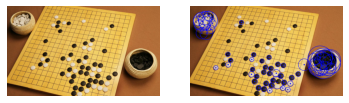

In [95]:
wq = cv2.imread("/Users/tanjun/Desktop/tanjun/opencv/wq.jpeg")

wqRGB = cv2.cv2.cvtColor(wq,cv2.COLOR_BGR2RGB)
wqShow = wqRGB.copy()

gray = cv2.cvtColor(wq,cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray,5)
edges = cv2.Canny(blur,50,150,apertureSize=3)
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,30,param1=10,param2=30,minRadius=10,maxRadius=100)
circles = np.uint16(np.around(circles))

for c in circles[0,:]:
    cv2.circle(wqShow,tuple(c[:2]),c[-1],(0,0,255),2)
    cv2.circle(wqShow,tuple(c[:2]),2,(0,0,255),5)
    
plt.subplot(121),plt.imshow(wqRGB),plt.axis("off")
plt.subplot(122),plt.imshow(wqShow),plt.axis("off")
plt.show()

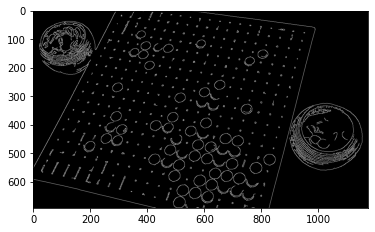

In [96]:
img_show(edges)

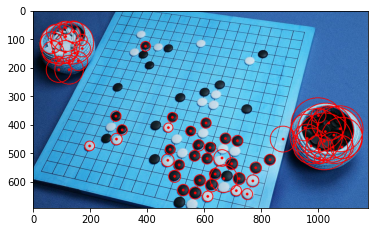

In [94]:
img_show(wqShow)